In [1]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
sbn.set_theme()

Data 1

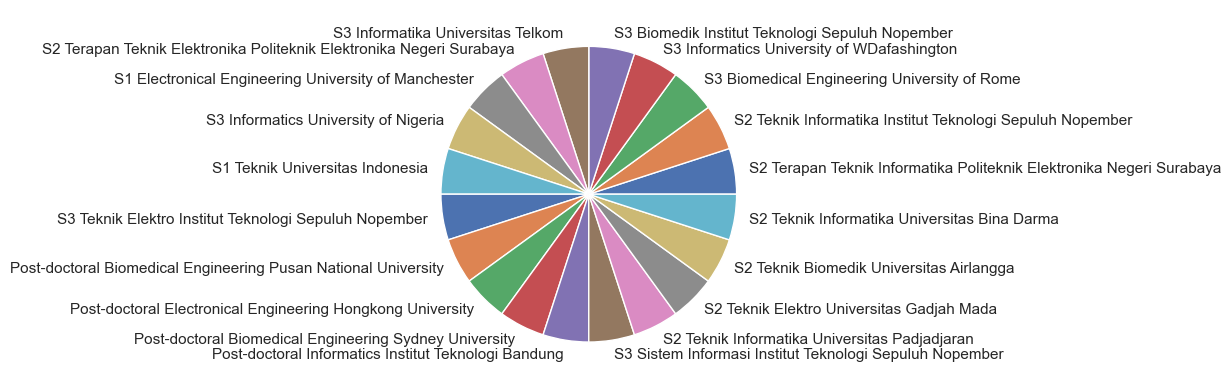

In [2]:
data1 = pd.read_csv("data1.csv")
data1.head()
plt.pie(data1["Jumlah"], labels=data1["Pendidikan Terakhir"])
plt.show()

<Axes: xlabel='Tahun Lahir', ylabel='Pendidikan Terakhir'>

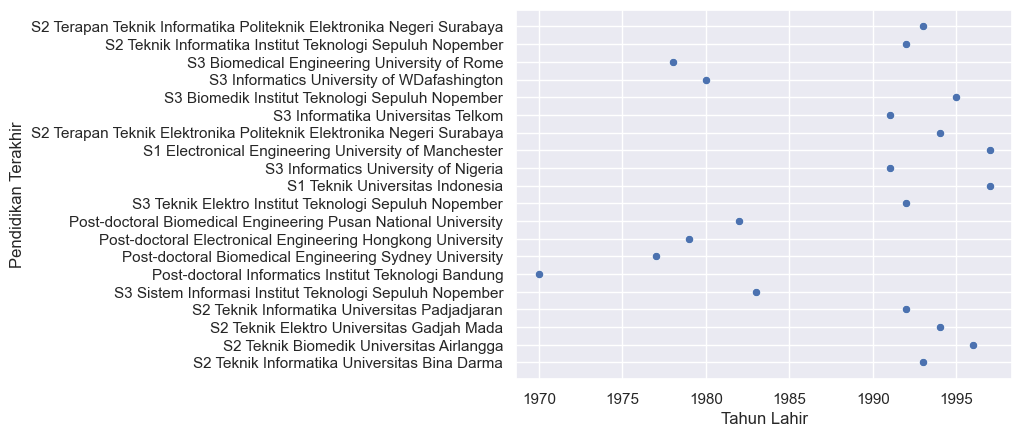

In [9]:
sbn.scatterplot(data1, x="Tahun Lahir", y="Pendidikan Terakhir")

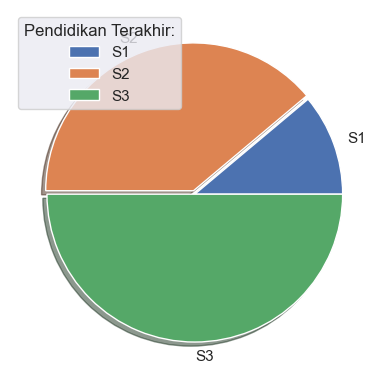

In [4]:
data1 = pd.read_csv("data1.csv")
tots = [2, 7, 9]
nil = ["S1", "S2", "S3"]
plt.pie(tots, labels=nil, explode=[0,0.025, 0], shadow=True)
plt.legend(title = "Pendidikan Terakhir:")
plt.show()

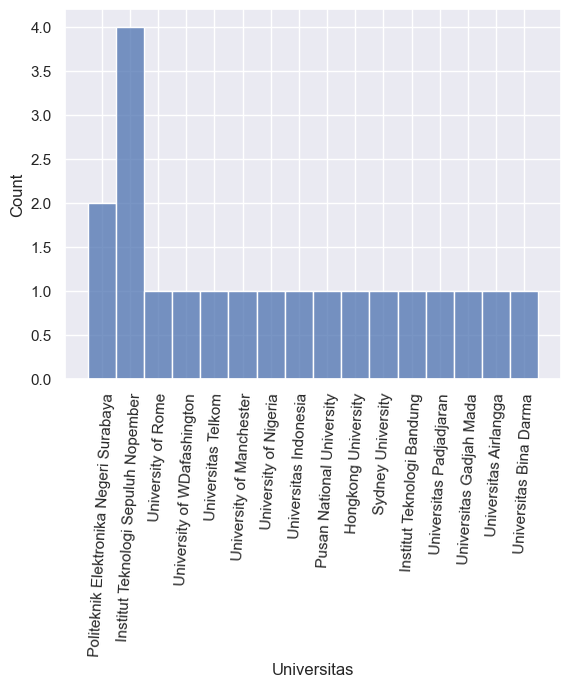

In [5]:
f = sbn.histplot(data=data1["Universitas"])
f.tick_params(axis='x', rotation=87)

Data 2

['Berat Badan Kurang', 'Obesitas', 'Berat Badan Normal', 'Kelebihan Berat Badan']


<Axes: xlabel='Berat Badan (kg)', ylabel='Tinggi Badan (cm)'>

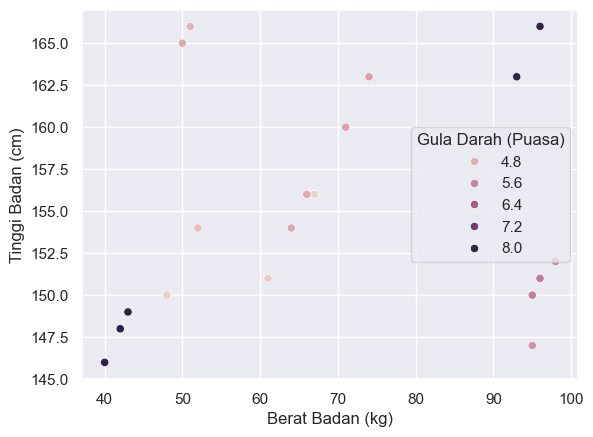

In [6]:
data2 = pd.read_csv("data2.csv")
#Pattern Matching untuk menentukan apakah orang ini over atau underweight
#Perhitungan BMI (Index Massa Tubuh)
tipe :list[str] = []
for i in range(len(data2["Berat Badan (kg)"])):
    nilai_indivi :float= data2["Berat Badan (kg)"][i] / ((data2["Tinggi Badan (cm)"][i] / 100)** 2)

    if nilai_indivi < 18.5:
        tipe.append("Berat Badan Kurang")
    elif 18.5 <= nilai_indivi <= 25:
        tipe.append("Berat Badan Normal")
    elif 25 < nilai_indivi < 30:
        tipe.append("Kelebihan Berat Badan")
    elif nilai_indivi >= 30:
        tipe.append("Obesitas")

#menambahkan Hasil Pattern Matching ke dalamnya
data2["Tipe"] = tipe
tipe_tipe :list[str] = []
#aku tidak menemukan fungsi untuk mendapatkan nilai - nilai yang ada dengan pandas, jadi saya buat sendiri
for i in data2["Tipe"]:
    if i in tipe_tipe:
        pass
    else:
        tipe_tipe.append(i)
print(tipe_tipe)
tots_tipe:list[int] = []
for i in tipe_tipe:
    tots_tipe.append(data2["Tipe"].value_counts()[i])

#yesss..... the plot 1
sbn.scatterplot(data=data2,
                x="Berat Badan (kg)",
                y="Tinggi Badan (cm)",
                hue="Gula Darah (Puasa)"
                )

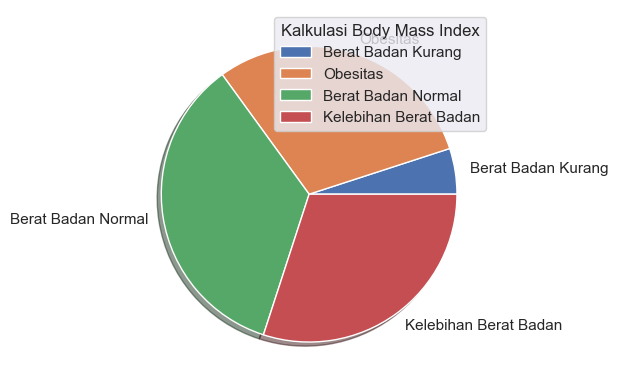

In [7]:
plt.pie(tots_tipe, labels=tipe_tipe, shadow=True, )
plt.legend(title = "Kalkulasi Body Mass Index")
plt.show()

Data 3

<Axes: xlabel='Tanggal', ylabel='value'>

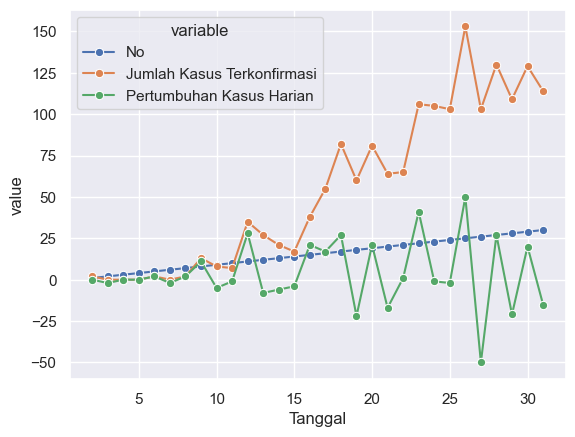

In [8]:
data3 = pd.read_csv("data3.csv")

data3["Pertumbuhan Kasus Harian"] = data3["Jumlah Kasus Terkonfirmasi"].diff().fillna(0)

that_data = pd.melt(data3, ["Tanggal"])
sbn.lineplot(data=that_data, 
             x="Tanggal",
             y="value",
             marker='o',
             hue='variable'
             )